In [1]:
from sklearn.neural_network import MLPClassifier

In [2]:
neural_network = MLPClassifier((100, 100))

In [ ]:
neural_network.fit(X, y)
neural_network.predict_proba(X)

# Images

In [8]:
!pip freeze | grep Pillow

You are using pip version 9.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Pillow==5.0.0


In [10]:
!ls

'Clase 03 - Visualizacion y Preprocesamiento.ipynb'   landscape.jpg
'Clase 03 - Web Scraping.ipynb'			     'Neural Networks.ipynb'
'Clase 04 - Machine Learning.ipynb'		      submission.csv
'Clase 04 - Validacion.ipynb'			      test.csv
 gender_submission.csv				      train.csv


In [11]:
from PIL import Image

In [13]:
img = Image.open('landscape.jpg')

In [15]:
import numpy as np

In [16]:
img_array = np.array(img)

In [17]:
img_array.shape

(147, 220, 3)

In [18]:
img_array[0,0]

array([25, 36, 19], dtype=uint8)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

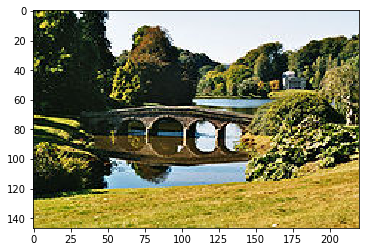

In [22]:
plt.imshow(img_array);

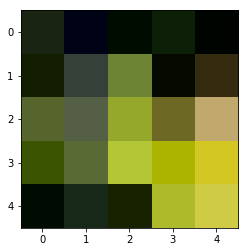

In [24]:
a = img_array[:5,:5]
plt.imshow(a);

In [25]:
img_array[:5,:5,0]

array([[ 25,   0,   0,  12,   0],
       [ 19,  53, 109,   5,  53],
       [ 86,  85, 149, 109, 193],
       [ 58,  89, 179, 172, 211],
       [  0,  23,  23, 174, 207]], dtype=uint8)

In [26]:
a = [4,5,2,6,2,1]

In [29]:
a[::-1]

[1, 2, 6, 2, 5, 4]

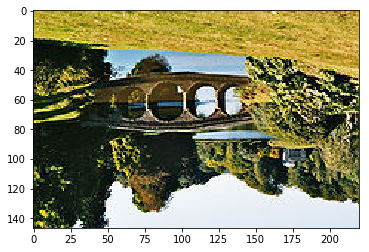

In [30]:
plt.imshow(img_array[::-1]);

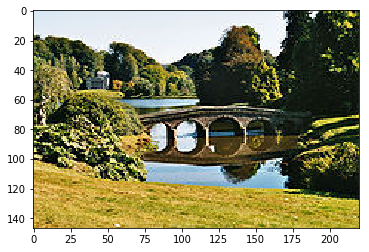

In [31]:
plt.imshow(img_array[:,::-1]);

In [34]:
img_array.min(), img_array.max()

(0, 255)

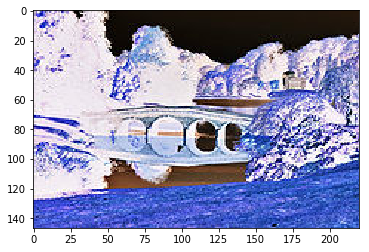

In [32]:
plt.imshow(255 - img_array);

In [38]:
np.stack([img_array, img_array]).shape

(2, 147, 220, 3)

## Fashion MNIST

In [45]:
from keras.datasets import fashion_mnist

In [46]:
(X_trn, y_trn), (X_tst, y_tst) = fashion_mnist.load_data()
X_trn.shape, X_tst.shape

4423680/4422102 [==============================] - 2s 0us/step


((60000, 28, 28), (10000, 28, 28))

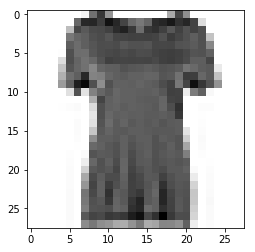

In [49]:
plt.imshow(X_trn[10], cmap='gray_r');

In [53]:
X_trn_flat = X_trn.reshape(len(X_trn), -1) / 255
X_tst_flat = X_tst.reshape(len(X_tst), -1) / 255

In [54]:
X_trn_flat.shape

(60000, 784)

## Model

In [57]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=20, n_estimators=40, n_jobs=-1)
model.fit(X_trn_flat, y_trn)

CPU times: user 45.4 s, sys: 12.3 ms, total: 45.4 s
Wall time: 6.25 s


In [58]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_tst_flat)
accuracy_score(y_tst, y_pred)

0.8716

In [60]:
%%time
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=20, verbose=True)
model.fit(X_trn_flat, y_trn)

Iteration 1, loss = 0.59179870
Iteration 2, loss = 0.42585984
Iteration 3, loss = 0.38912768
Iteration 4, loss = 0.36155914
Iteration 5, loss = 0.34456932
Iteration 6, loss = 0.32848402
Iteration 7, loss = 0.31660580
Iteration 8, loss = 0.30407842
Iteration 9, loss = 0.29610338
Iteration 10, loss = 0.29002175
Iteration 11, loss = 0.27890720
Iteration 12, loss = 0.27359456
Iteration 13, loss = 0.26482695
Iteration 14, loss = 0.25867726
Iteration 15, loss = 0.25127223
Iteration 16, loss = 0.24824541
Iteration 17, loss = 0.24218359
Iteration 18, loss = 0.24023747
Iteration 19, loss = 0.23436040
Iteration 20, loss = 0.22738777
CPU times: user 1min 19s, sys: 1min 24s, total: 2min 43s
Wall time: 22.5 s


/opt/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [61]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_tst_flat)
accuracy_score(y_tst, y_pred)

0.8844

## Keras

<img src="https://cdn-images-1.medium.com/max/1600/1*_l-0PeSh3oL2Wc2ri2sVWA.png"/>

In [64]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [68]:
X_trn = X_trn[..., None]
X_tst = X_tst[..., None]

In [69]:
X_trn.shape

(60000, 28, 28, 1)

In [71]:
input_shape = X_trn.shape[1:]
input_shape

(28, 28, 1)

In [73]:
num_classes = 10

In [85]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [86]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                51264     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

In [88]:
import keras

In [89]:
y_trn_onehot = keras.utils.to_categorical(y_trn)
y_tst_onehot = keras.utils.to_categorical(y_tst)

In [90]:
y_trn.shape, y_trn_onehot.shape

((60000,), (60000, 10))

In [91]:
y_trn[:4]

array([9, 0, 0, 3], dtype=uint8)

In [92]:
y_trn_onehot[:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [93]:
model.fit(X_trn, y_trn_onehot, batch_size=32, epochs=5, verbose=1,
          validation_data=(X_tst, y_tst_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 339us/step - loss: 0.9290 - acc: 0.7140 - val_loss: 0.4623 - val_acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 21s 348us/step - loss: 0.5183 - acc: 0.8084 - val_loss: 0.4137 - val_acc: 0.8471
Epoch 3/5
60000/60000 [==============================] - 21s 345us/step - loss: 0.4602 - acc: 0.8284 - val_loss: 0.4096 - val_acc: 0.8480
Epoch 4/5
60000/60000 [==============================] - 20s 339us/step - loss: 0.4243 - acc: 0.8434 - val_loss: 0.3751 - val_acc: 0.8666
Epoch 5/5
60000/60000 [==============================] - 22s 360us/step - loss: 0.3993 - acc: 0.8507 - val_loss: 0.3506 - val_acc: 0.8722


In [96]:
X_tst[0][None, ...].shape

(1, 28, 28, 1)

In [99]:
y_pred = model.predict(X_tst[0][None, ...])

In [98]:
model.predict(X_tst[0][None, ...]).shape

(1, 10)

In [100]:
np.argmax(y_pred)

9

In [101]:
X_tst.shape

(10000, 28, 28, 1)

In [103]:
X_tst[0].shape

(28, 28, 1)

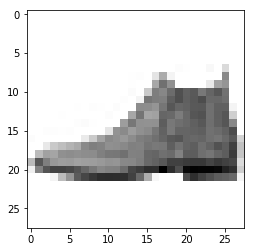

In [105]:
plt.imshow(X_tst[0][:,:,0], cmap='gray_r')

In [106]:
y_tst[0]

9

In [110]:
model.predict(X_tst).shape

(10000, 10)

In [111]:
y_pred = np.argmax(model.predict(X_tst), axis=1)

In [112]:
y_pred.shape

(10000,)

In [113]:
y_pred[:5]

array([9, 2, 1, 1, 6])

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_tst, y_pred)

0.8722

In [115]:
model.save('fashion_mnist_model.hdf5')

In [116]:
!ls -lh

total 3,3M
-rw-r--r-- 1 alulab alulab 572K feb  1 12:11 'Clase 03 - Visualizacion y Preprocesamiento.ipynb'
-rw-r--r-- 1 alulab alulab 1,2M feb  1 10:38 'Clase 03 - Web Scraping.ipynb'
-rw-r--r-- 1 alulab alulab  48K feb  4 10:34 'Clase 04 - Machine Learning.ipynb'
-rw-r--r-- 1 alulab alulab  46K feb  4 12:18 'Clase 04 - Validacion.ipynb'
-rw-r--r-- 1 alulab alulab 756K feb  6 12:11  fashion_mnist_model.hdf5
-rw-rw-r-- 1 alulab alulab 2,8K feb  4 10:25  gender_submission.csv
-rw-rw-r-- 1 alulab alulab  19K feb  6 11:05  landscape.jpg
-rw-r--r-- 1 alulab alulab 588K feb  6 12:11 'Neural Networks.ipynb'
-rw-r--r-- 1 alulab alulab 2,8K feb  4 10:25  submission.csv
-rw-rw-r-- 1 alulab alulab  28K abr  9  2018  test.csv
-rw-rw-r-- 1 alulab alulab  60K abr  9  2018  train.csv


In [117]:
from keras.models import load_model

In [118]:
loaded_model = load_model('fashion_mnist_model.hdf5')

In [119]:
loaded_model.predict(X_tst[0][None, ...])

array([[7.7192759e-16, 3.7962413e-16, 3.0388078e-17, 1.1947368e-15,
        4.6866568e-17, 3.0596925e-06, 2.5210508e-15, 1.4487367e-04,
        8.7370658e-12, 9.9985206e-01]], dtype=float32)